# HW1

Consider the function

$$f(x) = \frac{e^x-1}{x}.$$

As we saw in the previous problem, $|\kappa_f(x)|<1$ for all $|x|<1$ and $x \not=0$. In that sense, $f$ is ``easy'' to compute accurately. In practice, though, it's not so simple.

An obvious sequence of steps to compute $f$ is as follows:
$$
  y_1 = e^x, \qquad y_2 = y_1 - 1, \qquad y_3 = y_2/x.
$$

The operations for $y_1$ and $y_3$ are well conditioned for $|x|<1$, but the subtraction to get $y_2$ will suffer from cancellation error if $y_1\approx 1$, or $x\approx 0$. That error makes this sequence of operations unstable for $x\approx 0$.

Now consider the Maclaurin series expansion of $f$,
$$
  f(x) = 1 + \frac{1}{2!} x + \frac{1}{3!}x^2 + \cdots.
$$

For $x>0$, every term in the series is positive, leaving no possibility of cancellation error. (The analysis for negative $x$ is more subtle.) If $x\approx 0$, then we should be able to find $n$ such that $x^n/(n+1)!$ is smaller than machine precision, so that adding it to the terms before it will not change the result numerically. Thus a truncated form of the series can serve as a stable method for $x\approx 0$. 

**Goals:** You will experiment with the two methods of computing $f$ and observe their relative accuracy. 

**Procedure:** Perform the following steps. 

In [2]:
# import dependencies
using Plots

If you don't have the julia dependencies, use the following code cell to download the packages.

In [ ]:
using Pkg
Pkg.add("Plots")

### (a)

Julia has a stable way of computing $y_2$ in (1) without using subtraction. You will use it to get reference "exact" values of $f$. Define ``x`` as
```
x = exp10.(range(-16, stop=0, length=500));
```
which creates a vector of 500 logarithmically spaced points between decades $10^{-16}$ and $10^0$.  (Note that this means that the points $x_j$ satisfy $\log_{10}(x_{j+1}) - \log_{10}(x_j) = 16/500$.)
  
  Create a vector ``x`` the same size as``x`` such that $y_j$ is the result of ``expm1(x[j])/x[j]``.  (Note that you do not need to use a ``for loop`` to complete this task -- you can *vectorize* this operation using the "dot" operation.  To vectorize the ``expm1()`` function, you use ``expm1.()``, and to vectorize the ``/`` operation, you use ``./``.) 
  
  See https://docs.julialang.org/en/v1/base/math/#Base.expm1 for more information about the \texttt{expm1()} function.

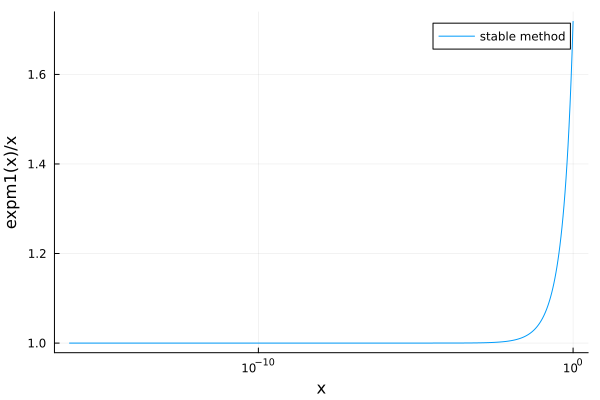

In [3]:
# create logarithmic scaled vector values
x = exp10.(range(-16, stop = 0, length = 500))

# use stable formula for calculating exponential minus one function
y = expm1.(x) ./ x

# plot to verify
plot(x, y, xaxis=:log, label="stable method", xlabel="x", ylabel="expm1(x)/x")

### (b)

Create a vector ``z`` such that $z_j$ is computed using the three steps in (1) for $x_j$.

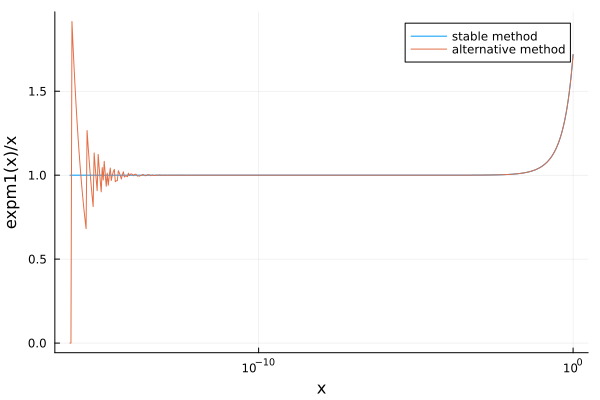

In [4]:
y1 = exp.(x)
y2 = y1 .- 1
z = y2 ./ x

# plot to verify. The plot! function is used to add the new data to the existing plot
plot!(x, z, xaxis=:log, label="alternative method", xlabel="x")

Notice that the results are clearly unstable at small x!

### (c)

Compute a vector of relative differences between $z_j$ and $y_j$. Make a semi-log plot ($x$ axis on logarithmic scale and $y$ axis on linear scale) of the result as a function of $x$. You will see a loss of accuracy as $x\to 0$.  To make this plot, you will need to use the ``Plots`` package, which you will need to install. 

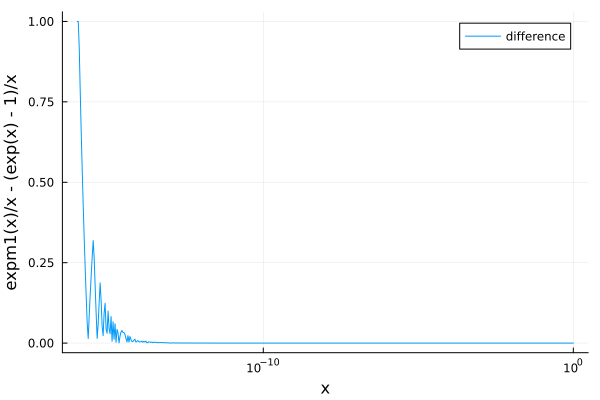

In [5]:
# compute the relative difference between the two methods
diff = (z .- y) ./ y

# make semi-log plot of the difference
plot(x, abs.(diff), xaxis=:log, label="difference", xlabel="x", ylabel="expm1(x)/x - (exp(x) - 1)/x")

### (d)

By trial and error, find a value of $n$ such that $0.01^n/(n+1)!$ is less than ``eps()`` (machine epsilon). This defines the last term to keep in truncating the series (2).

In [6]:
n = 0

# use while loop to find the smallest n such that the term is less than eps()
while true
    term = 0.01 ^ n / factorial(n+1)
    if term < eps()
        println("The smallest n such that the term is less than eps() is: ", n)
        break
    end
    n += 1
end

The smallest n such that the term is less than eps() is: 6


### (e)

Create a vector ``w`` such that $w_j$ is computed using the truncated form of (2). Repeat step 3 for ``w`` in place of ``z``. This time you should see accuracy maintained as $x\to 0$. (If more terms of the series were kept, the accuracy could be maintained as $x\to 1$ as well, but the direct method is more efficient there.)

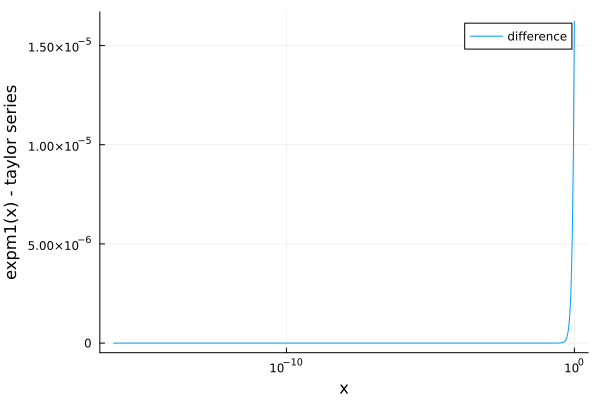

In [8]:
# define the taylor series function for expm1
function expm1_taylor(x)
    result = 0
    for i = 0:n # julia loops include the last value
        term = x ^ i / factorial(i+1)
        result += term
    end
    return result
end

w = expm1_taylor.(x)

# calculatae the difference between the taylor series and the stable method
diff2 = abs.((w .- y) ./ y)

# make semi-log plot of the difference
plot(x, diff2, xaxis=:log, label="difference", xlabel="x", ylabel="expm1(x) - taylor series")

We have kept the stability at low values of x!